<a href="https://colab.research.google.com/github/RoseVZ/TensorflowCert/blob/main/MedicalCOstRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
X=dataset.drop('charges',axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [24]:
y=dataset['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [25]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [30]:
X.shape,y.shape

((1338, 8), (1338,))

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1,shuffle=True)

In [33]:
X_train.shape,X_test.shape

((1070, 8), (268, 8))

In [93]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[8],activation='relu'),
  tf.keras.layers.Dense(1000,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
     tf.keras.layers.Dense(100,activation='relu'),
     tf.keras.layers.Dense(1)
])
model.compile(loss = 'mae',optimizer='adam',metrics=['mae'])

In [100]:
history=model.fit(X_train,y_train,epochs=100,verbose=0)

In [95]:
y_pred=model.predict(X_test)

In [96]:
y_pred.shape

(268, 1)

In [97]:
y_test.shape

(268,)

In [101]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3390.9080 - mae: 3390.9080


[3390.907958984375, 3390.907958984375]

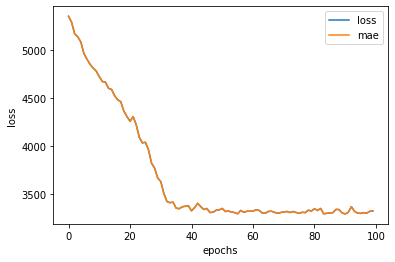

In [102]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Normalization (Standard Scaler)

In [103]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))


In [105]:
X = dataset.drop("charges", axis=1)
y = dataset["charges"]

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [107]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [109]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [118]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
  tf.keras.layers.Dense(1000,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
     tf.keras.layers.Dense(100,activation='relu'),
     tf.keras.layers.Dense(1)
])
model_1.compile(loss = 'mae',optimizer='adam',metrics=['mae'])

In [119]:
history=model_1.fit(X_train_normal,y_train,epochs=200,verbose=0)

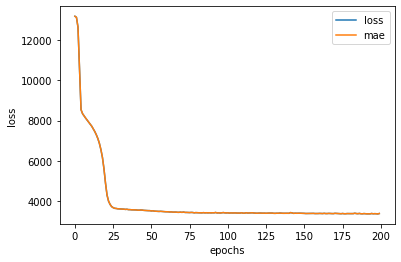

In [120]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [121]:
model_1.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2914.2571 - mae: 2914.2571


[2914.257080078125, 2914.257080078125]

In [127]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
  tf.keras.layers.Dense(1000,activation='relu'),
  tf.keras.layers.Dense(1000,activation='relu'),
     tf.keras.layers.Dense(100,activation='relu'),
     tf.keras.layers.Dense(1)
])
model_2.compile(loss = 'mae',optimizer='adam',metrics=['mae'])

In [128]:
history=model_2.fit(X_train_normal,y_train,epochs=200,verbose=0)

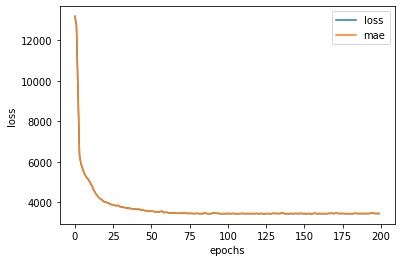

In [129]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [130]:
model_2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3035.1829 - mae: 3035.1829


[3035.182861328125, 3035.182861328125]

In [ ]:
##model_1 with best results after normalization